loading and checking dataset



In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [5]:

df = pd.read_csv("/content/Healthcare.csv")
df.head()


,Patient_ID,Age,Gender,Symptoms,Symptom_Count,Disease
0,1,29,Male,"fever, back pain, shortness of breath",3,Allergy
1,2,76,Female,"insomnia, back pain, weight loss",3,Thyroid Disorder
2,3,78,Male,"sore throat, vomiting, diarrhea",3,Influenza
3,4,58,Other,"blurred vision, depression, weight loss, muscl...",4,Stroke
4,5,55,Female,"swelling, appetite loss, nausea",3,Heart Disease


In [6]:

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

print("\nNumber of unique diseases:", df['Disease'].nunique())
print("\nDisease counts:")
print(df['Disease'].value_counts().sort_index())


Shape: (25000, 6)

Columns: ['Patient_ID', 'Age', 'Gender', 'Symptoms', 'Symptom_Count', 'Disease']

Number of unique diseases: 30

Disease counts:
Disease
Allergy                   858
Anemia                    814
Anxiety                   911
Arthritis                 896
Asthma                    782
Bronchitis                856
COVID-19                  839
Chronic Kidney Disease    807
Common Cold               805
Dementia                  823
Depression                859
Dermatitis                856
Diabetes                  850
Epilepsy                  832
Food Poisoning            871
Gastritis                 804
Heart Disease             804
Hypertension              833
IBS                       830
Influenza                 824
Liver Disease             830
Migraine                  854
Obesity                   819
Parkinson's               826
Pneumonia                 830
Sinusitis                 795
Stroke                    790
Thyroid Disorder          855
Tube

In [7]:

df.isna().sum()


,0
Patient_ID,0
Age,0
Gender,0
Symptoms,0
Symptom_Count,0
Disease,0


In [8]:


def parse_symptoms(sym_str):
    return [s.strip().lower() for s in sym_str.split(",")]

all_symptoms = set()
for s in df["Symptoms"]:
    all_symptoms.update(parse_symptoms(s))

print("Number of unique symptoms:", len(all_symptoms))
sorted(all_symptoms)


Number of unique symptoms: 28


['abdominal pain',
 'anxiety',
 'appetite loss',
 'back pain',
 'blurred vision',
 'chest pain',
 'cough',
 'depression',
 'diarrhea',
 'dizziness',
 'fatigue',
 'fever',
 'headache',
 'insomnia',
 'joint pain',
 'muscle pain',
 'nausea',
 'rash',
 'runny nose',
 'shortness of breath',
 'sneezing',
 'sore throat',
 'sweating',
 'swelling',
 'tremors',
 'vomiting',
 'weight gain',
 'weight loss']

Data Processing

In [9]:
print(df['Disease'].nunique())
print(df['Disease'].unique())


30
['Allergy' 'Thyroid Disorder' 'Influenza' 'Stroke' 'Heart Disease'
 'Food Poisoning' 'Bronchitis' 'COVID-19' 'Dermatitis' 'Diabetes'
 'Arthritis' 'Sinusitis' 'Dementia' "Parkinson's" 'Obesity' 'Asthma'
 'Depression' 'Gastritis' 'Liver Disease' 'Epilepsy' 'IBS' 'Tuberculosis'
 'Pneumonia' 'Anemia' 'Migraine' 'Common Cold' 'Anxiety'
 'Chronic Kidney Disease' 'Ulcer' 'Hypertension']


In [10]:

diseases = sorted(df["Disease"].unique())
len(diseases), diseases[:35]


(30,
 ['Allergy',
  'Anemia',
  'Anxiety',
  'Arthritis',
  'Asthma',
  'Bronchitis',
  'COVID-19',
  'Chronic Kidney Disease',
  'Common Cold',
  'Dementia',
  'Depression',
  'Dermatitis',
  'Diabetes',
  'Epilepsy',
  'Food Poisoning',
  'Gastritis',
  'Heart Disease',
  'Hypertension',
  'IBS',
  'Influenza',
  'Liver Disease',
  'Migraine',
  'Obesity',
  "Parkinson's",
  'Pneumonia',
  'Sinusitis',
  'Stroke',
  'Thyroid Disorder',
  'Tuberculosis',
  'Ulcer'])

In [11]:

symptoms = sorted(list(all_symptoms))
len(symptoms), symptoms[:50]


(28,
 ['abdominal pain',
  'anxiety',
  'appetite loss',
  'back pain',
  'blurred vision',
  'chest pain',
  'cough',
  'depression',
  'diarrhea',
  'dizziness',
  'fatigue',
  'fever',
  'headache',
  'insomnia',
  'joint pain',
  'muscle pain',
  'nausea',
  'rash',
  'runny nose',
  'shortness of breath',
  'sneezing',
  'sore throat',
  'sweating',
  'swelling',
  'tremors',
  'vomiting',
  'weight gain',
  'weight loss'])

In [12]:

matrix = pd.DataFrame(0, index=diseases, columns=symptoms)

# Fill
for _, row in df.iterrows():
    disease = row["Disease"]
    for symptom in parse_symptoms(row["Symptoms"]):
        matrix.loc[disease, symptom] += 1

matrix


,abdominal pain,anxiety,appetite loss,back pain,blurred vision,chest pain,cough,depression,diarrhea,dizziness,...,runny nose,shortness of breath,sneezing,sore throat,sweating,swelling,tremors,vomiting,weight gain,weight loss
Allergy,163,166,145,156,154,158,156,146,155,151,...,152,147,186,149,142,158,149,151,153,146
Anemia,135,136,142,163,173,149,150,143,177,146,...,160,152,159,140,137,131,149,143,144,145
Anxiety,134,172,161,158,163,134,163,165,170,170,...,153,176,158,160,163,158,170,171,197,139
Arthritis,170,149,170,175,130,137,164,178,139,170,...,144,190,162,172,167,136,161,162,147,142
Asthma,139,143,146,133,143,128,149,129,134,144,...,156,138,142,139,133,147,140,153,123,142
Bronchitis,128,159,160,151,159,165,167,155,130,136,...,144,161,144,174,167,155,145,166,160,156
COVID-19,151,150,146,149,150,149,137,156,159,141,...,157,149,173,153,148,132,146,157,138,159
Chronic Kidney Disease,131,149,153,140,162,122,141,154,140,153,...,137,158,134,143,161,148,112,146,143,155
Common Cold,123,163,147,166,123,171,138,182,152,141,...,134,136,161,139,146,143,140,146,142,151
Dementia,150,136,160,145,136,142,137,131,138,149,...,136,144,154,137,140,161,160,155,157,148


In [13]:


prob_matrix = matrix.div(matrix.sum(axis=1), axis=0).fillna(0)
prob_matrix.head()


,abdominal pain,anxiety,appetite loss,back pain,blurred vision,chest pain,cough,depression,diarrhea,dizziness,...,runny nose,shortness of breath,sneezing,sore throat,sweating,swelling,tremors,vomiting,weight gain,weight loss
Allergy,0.037810,0.038506,0.033635,0.036186,0.035723,0.036650,0.036186,0.033867,0.035955,0.035027,...,0.035259,0.034099,0.043145,0.034563,0.032939,0.036650,0.034563,0.035027,0.035491,0.033867
Anemia,0.032082,0.032319,0.033745,0.038736,0.041112,0.035409,0.035646,0.033983,0.042063,0.034696,...,0.038023,0.036122,0.037785,0.033270,0.032557,0.031131,0.035409,0.033983,0.034221,0.034458
Anxiety,0.029464,0.037819,0.035400,0.034741,0.035840,0.029464,0.035840,0.036280,0.037379,0.037379,...,0.033641,0.038698,0.034741,0.035180,0.035840,0.034741,0.037379,0.037599,0.043316,0.030563
Arthritis,0.037980,0.033289,0.037980,0.039097,0.029044,0.030608,0.036640,0.039768,0.031055,0.037980,...,0.032172,0.042449,0.036193,0.038427,0.037310,0.030384,0.035970,0.036193,0.032842,0.031725
Asthma,0.035659,0.036685,0.037455,0.034120,0.036685,0.032837,0.038225,0.033094,0.034377,0.036942,...,0.040021,0.035403,0.036429,0.035659,0.034120,0.037712,0.035916,0.039251,0.031555,0.036429


In [14]:
matrix.shape, prob_matrix.shape


((30, 28), (30, 28))

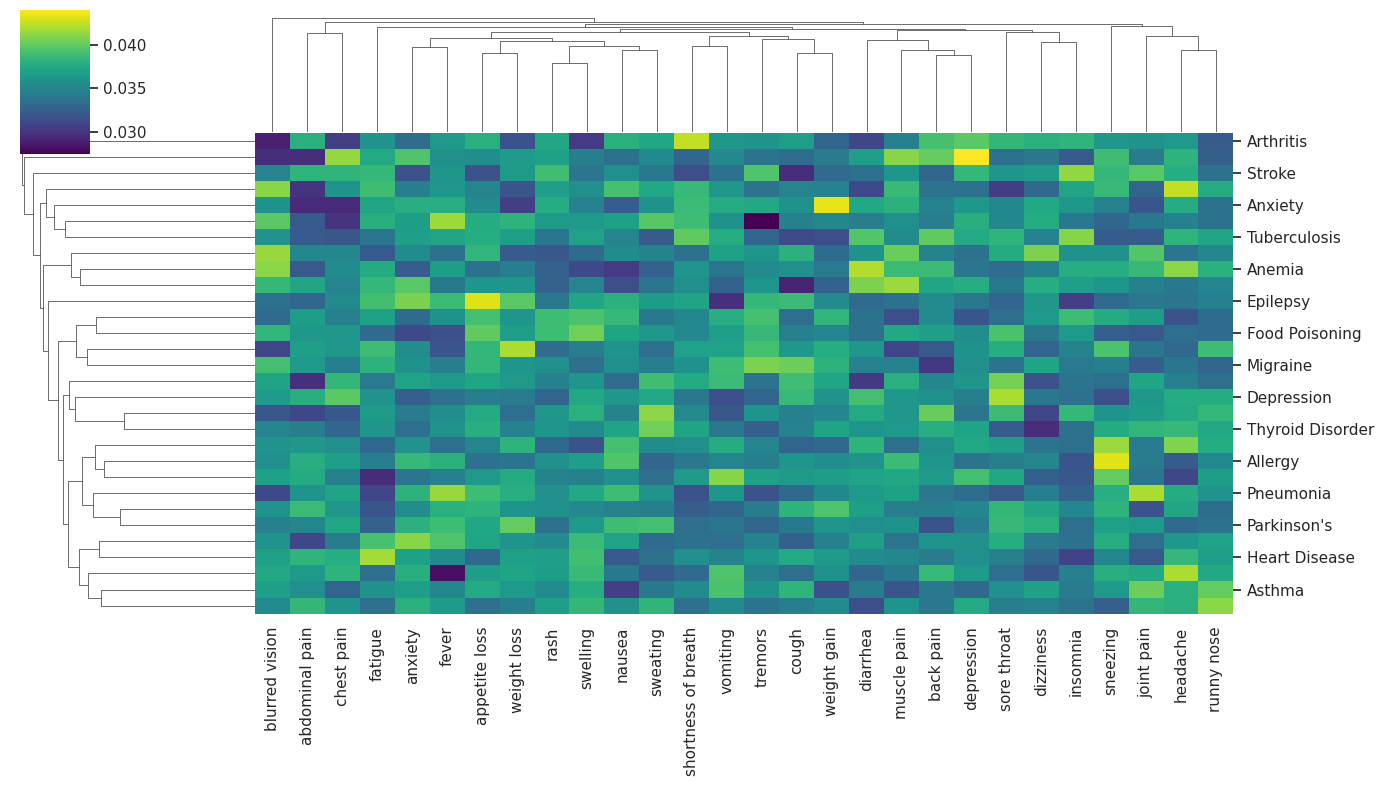

In [15]:


sns.clustermap(prob_matrix, cmap="viridis", figsize=(14, 8))
plt.show()


In [16]:


from sklearn.metrics.pairwise import cosine_distances

dist_matrix = pd.DataFrame(
    cosine_distances(prob_matrix),
    index=diseases,
    columns=diseases
)

dist_matrix.head()


,Allergy,Anemia,Anxiety,Arthritis,Asthma,Bronchitis,COVID-19,Chronic Kidney Disease,Common Cold,Dementia,...,Liver Disease,Migraine,Obesity,Parkinson's,Pneumonia,Sinusitis,Stroke,Thyroid Disorder,Tuberculosis,Ulcer
Allergy,0.000000,0.006358,0.006270,0.007051,0.005305,0.005616,0.003507,0.006065,0.005449,0.004220,...,0.002880,0.004703,0.002888,0.003032,0.003574,0.004588,0.005757,0.004251,0.006991,0.004193
Anemia,0.006358,0.000000,0.005844,0.009141,0.004829,0.007227,0.004631,0.007510,0.007274,0.008328,...,0.005895,0.006832,0.006686,0.007813,0.007570,0.003884,0.006035,0.004573,0.004941,0.006736
Anxiety,0.006270,0.005844,0.000000,0.006300,0.006337,0.005135,0.007045,0.004822,0.007149,0.005786,...,0.004761,0.003946,0.006322,0.006644,0.008428,0.005903,0.008355,0.005078,0.005386,0.006340
Arthritis,0.007051,0.009141,0.006300,0.000000,0.006745,0.006569,0.005937,0.006294,0.008108,0.005551,...,0.006068,0.006406,0.006495,0.006921,0.008441,0.008022,0.006549,0.005185,0.005794,0.006467
Asthma,0.005305,0.004829,0.006337,0.006745,0.000000,0.004634,0.004258,0.005683,0.008529,0.004466,...,0.004618,0.004164,0.004827,0.004899,0.004801,0.005776,0.006059,0.004516,0.005096,0.002999


In [41]:
from sklearn.cluster import AgglomerativeClustering

n_groups = 7

clustering = AgglomerativeClustering(
    n_clusters=n_groups,
    metric="euclidean",
    linkage="ward"
)

labels = clustering.fit_predict(prob_matrix)


disease_group_map = {
    disease: f"Group_{label}"
    for disease, label in zip(diseases, labels)
}

disease_group_map



{'Allergy': 'Group_1',
 'Anemia': 'Group_3',
 'Anxiety': 'Group_2',
 'Arthritis': 'Group_5',
 'Asthma': 'Group_4',
 'Bronchitis': 'Group_1',
 'COVID-19': 'Group_4',
 'Chronic Kidney Disease': 'Group_2',
 'Common Cold': 'Group_6',
 'Dementia': 'Group_0',
 'Depression': 'Group_1',
 'Dermatitis': 'Group_0',
 'Diabetes': 'Group_0',
 'Epilepsy': 'Group_0',
 'Food Poisoning': 'Group_0',
 'Gastritis': 'Group_4',
 'Heart Disease': 'Group_0',
 'Hypertension': 'Group_2',
 'IBS': 'Group_1',
 'Influenza': 'Group_2',
 'Liver Disease': 'Group_1',
 'Migraine': 'Group_0',
 'Obesity': 'Group_1',
 "Parkinson's": 'Group_1',
 'Pneumonia': 'Group_1',
 'Sinusitis': 'Group_3',
 'Stroke': 'Group_3',
 'Thyroid Disorder': 'Group_2',
 'Tuberculosis': 'Group_2',
 'Ulcer': 'Group_4'}

In [42]:


df["Disease_Group"] = df["Disease"].map(disease_group_map)
df[["Disease", "Disease_Group"]].head()


,Disease,Disease_Group
0,Allergy,Group_1
1,Thyroid Disorder,Group_2
2,Influenza,Group_2
3,Stroke,Group_3
4,Heart Disease,Group_0


In [43]:


def parse_symptoms(sym_str):
    return [s.strip().lower() for s in sym_str.split(",")]

df["Symptom_List"] = df["Symptoms"].apply(parse_symptoms)

df["Symptom_List"].head()


,Symptom_List
0,"[fever, back pain, shortness of breath]"
1,"[insomnia, back pain, weight loss]"
2,"[sore throat, vomiting, diarrhea]"
3,"[blurred vision, depression, weight loss, musc..."
4,"[swelling, appetite loss, nausea]"


In [44]:


df["Symptom_Text"] = df["Symptom_List"].apply(
    lambda lst: " ".join([s.replace(" ", "_") for s in lst])
)

df["Symptom_Text"].head()


,Symptom_Text
0,fever back_pain shortness_of_breath
1,insomnia back_pain weight_loss
2,sore_throat vomiting diarrhea
3,blurred_vision depression weight_loss muscle_pain
4,swelling appetite_loss nausea


In [45]:

symptoms = sorted(list(all_symptoms))


symptom_index = {symptom: i for i, symptom in enumerate(symptoms)}
symptom_index


{'abdominal pain': 0,
 'anxiety': 1,
 'appetite loss': 2,
 'back pain': 3,
 'blurred vision': 4,
 'chest pain': 5,
 'cough': 6,
 'depression': 7,
 'diarrhea': 8,
 'dizziness': 9,
 'fatigue': 10,
 'fever': 11,
 'headache': 12,
 'insomnia': 13,
 'joint pain': 14,
 'muscle pain': 15,
 'nausea': 16,
 'rash': 17,
 'runny nose': 18,
 'shortness of breath': 19,
 'sneezing': 20,
 'sore throat': 21,
 'sweating': 22,
 'swelling': 23,
 'tremors': 24,
 'vomiting': 25,
 'weight gain': 26,
 'weight loss': 27}

In [46]:
import numpy as np

def multi_hot_encode(symptom_list):
    vec = np.zeros(len(symptoms), dtype=int)
    for s in symptom_list:
        vec[symptom_index[s]] = 1
    return vec

df["Symptom_MultiHot"] = df["Symptom_List"].apply(multi_hot_encode)

df["Symptom_MultiHot"].head()


,Symptom_MultiHot
0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [47]:


def to_seq(symptom_list):
    return [symptom_index[s] for s in symptom_list]

df["Symptom_Seq"] = df["Symptom_List"].apply(to_seq)

df["Symptom_Seq"].head()


,Symptom_Seq
0,"[11, 3, 19]"
1,"[13, 3, 27]"
2,"[21, 25, 8]"
3,"[4, 7, 27, 15]"
4,"[23, 2, 16]"


In [48]:


group_names = sorted(df["Disease_Group"].unique())
group_to_id = {g: i for i, g in enumerate(group_names)}

df["Group_ID"] = df["Disease_Group"].map(group_to_id)

group_to_id


{'Group_0': 0,
 'Group_1': 1,
 'Group_2': 2,
 'Group_3': 3,
 'Group_4': 4,
 'Group_5': 5,
 'Group_6': 6}

In [49]:
df.head()


,Patient_ID,Age,Gender,Symptoms,Symptom_Count,Disease,Symptom_List,Symptom_Tuple,Disease_Group,Symptom_Text,Symptom_MultiHot,Symptom_Seq,Group_ID
0,1,29,Male,"fever, back pain, shortness of breath",3,Allergy,"[fever, back pain, shortness of breath]","(back pain, fever, shortness of breath)",Group_1,fever back_pain shortness_of_breath,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[11, 3, 19]",1
1,2,76,Female,"insomnia, back pain, weight loss",3,Thyroid Disorder,"[insomnia, back pain, weight loss]","(back pain, insomnia, weight loss)",Group_2,insomnia back_pain weight_loss,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[13, 3, 27]",2
2,3,78,Male,"sore throat, vomiting, diarrhea",3,Influenza,"[sore throat, vomiting, diarrhea]","(diarrhea, sore throat, vomiting)",Group_2,sore_throat vomiting diarrhea,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[21, 25, 8]",2
3,4,58,Other,"blurred vision, depression, weight loss, muscl...",4,Stroke,"[blurred vision, depression, weight loss, musc...","(blurred vision, depression, muscle pain, weig...",Group_3,blurred_vision depression weight_loss muscle_pain,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[4, 7, 27, 15]",3
4,5,55,Female,"swelling, appetite loss, nausea",3,Heart Disease,"[swelling, appetite loss, nausea]","(appetite loss, nausea, swelling)",Group_0,swelling appetite_loss nausea,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[23, 2, 16]",0


In [50]:
from sklearn.model_selection import train_test_split

# Labels
y = df["Group_ID"]


train_idx, temp_idx = train_test_split(
    df.index,
    test_size=0.30,
    random_state=42,
    stratify=y
)


val_idx, test_idx = train_test_split(
    temp_idx,
    test_size=0.50,
    random_state=42,
    stratify=y.loc[temp_idx]
)

len(train_idx), len(val_idx), len(test_idx)


(17500, 3750, 3750)

In [51]:
X_text_train = df.loc[train_idx, "Symptom_Text"]
X_text_val   = df.loc[val_idx,   "Symptom_Text"]
X_text_test  = df.loc[test_idx,  "Symptom_Text"]

y_train = df.loc[train_idx, "Group_ID"]
y_val   = df.loc[val_idx,   "Group_ID"]
y_test  = df.loc[test_idx,  "Group_ID"]


In [52]:
import numpy as np

X_mh_train = np.stack(df.loc[train_idx, "Symptom_MultiHot"].values)
X_mh_val   = np.stack(df.loc[val_idx,   "Symptom_MultiHot"].values)
X_mh_test  = np.stack(df.loc[test_idx,  "Symptom_MultiHot"].values)


In [53]:
X_seq_train = df.loc[train_idx, "Symptom_Seq"].tolist()
X_seq_val   = df.loc[val_idx,   "Symptom_Seq"].tolist()
X_seq_test  = df.loc[test_idx,  "Symptom_Seq"].tolist()


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    token_pattern=r"\S+",
    lowercase=False,
    ngram_range=(1, 1)
)


X_tfidf_train = tfidf.fit_transform(X_text_train)
X_tfidf_val   = tfidf.transform(X_text_val)
X_tfidf_test  = tfidf.transform(X_text_test)

X_tfidf_train.shape, X_tfidf_val.shape, X_tfidf_test.shape


((17500, 28), (3750, 28), (3750, 28))

In [55]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC()

svm_clf.fit(X_tfidf_train, y_train)


LinearSVC()

In [74]:
from sklearn.metrics import accuracy_score, classification_report


val_pred = svm_clf.predict(X_tfidf_val)
val_acc = accuracy_score(y_val, val_pred)
print("Validation Accuracy:", val_acc)

val_acc_svm = val_acc
test_acc_svm = test_acc



test_pred = svm_clf.predict(X_tfidf_test)
test_acc = accuracy_score(y_test, test_pred)
print("Test Accuracy:", test_acc)


Validation Accuracy: 0.2733333333333333
Test Accuracy: 0.2717333333333333


In [57]:
print("\nClassification Report (Test):")
print(classification_report(y_test, test_pred, target_names=group_names))



Classification Report (Test):
              precision    recall  f1-score   support

     Group_0       0.27      0.17      0.21       884
     Group_1       0.27      0.84      0.41      1006
     Group_2       0.23      0.03      0.06       756
     Group_3       0.00      0.00      0.00       360
     Group_4       0.00      0.00      0.00       489
     Group_5       0.00      0.00      0.00       134
     Group_6       0.00      0.00      0.00       121

    accuracy                           0.27      3750
   macro avg       0.11      0.15      0.10      3750
weighted avg       0.18      0.27      0.17      3750



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
import joblib

joblib.dump(svm_clf, "svm_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [59]:
num_classes = len(group_names)

from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes)
y_val_cat   = to_categorical(y_val, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_ffnn = Sequential([
    Dense(64, activation='relu', input_shape=(len(symptoms),)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_ffnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_ffnn.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,167 (16.28 KB)

 Trainable params: 4,167 (16.28 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model_ffnn.fit(
    X_mh_train, y_train_cat,
    validation_data=(X_mh_val, y_val_cat),
    epochs=40,
    batch_size=64,
    callbacks=[es],
    verbose=1
)


Epoch 1/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2343 - loss: 1.8169 - val_accuracy: 0.2675 - val_loss: 1.7447
Epoch 2/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2569 - loss: 1.7539 - val_accuracy: 0.2627 - val_loss: 1.7423
Epoch 3/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2703 - loss: 1.7374 - val_accuracy: 0.2672 - val_loss: 1.7409
Epoch 4/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2769 - loss: 1.7320 - val_accuracy: 0.2656 - val_loss: 1.7413
Epoch 5/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2748 - loss: 1.7327 - val_accuracy: 0.2677 - val_loss: 1.7397
Epoch 6/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2705 - loss: 1.7339 - val_accuracy: 0.2731 - val_loss: 1.7403
Epoch 7/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2797 - loss: 1.7248 - val_accuracy: 0.2645 - val_loss: 1.7398
Epoch 8/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2746 - loss: 1.7275 - val_accuracy: 0.

In [62]:
val_loss, val_acc = model_ffnn.evaluate(X_mh_val, y_val_cat, verbose=0)
test_loss, test_acc = model_ffnn.evaluate(X_mh_test, y_test_cat, verbose=0)

print("FFNN Validation Accuracy:", val_acc)
print("FFNN Test Accuracy:", test_acc)


FFNN Validation Accuracy: 0.2677333354949951
FFNN Test Accuracy: 0.2687999904155731


In [75]:
val_acc_ffnn = val_acc
test_acc_ffnn = test_acc


In [63]:
model_ffnn.save("ffnn_model.h5")


In [64]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = df["Symptom_Seq"].apply(len).max()
print("Max sequence length:", max_len)

X_seq_train_pad = pad_sequences(X_seq_train, maxlen=max_len, padding='post')
X_seq_val_pad   = pad_sequences(X_seq_val,   maxlen=max_len, padding='post')
X_seq_test_pad  = pad_sequences(X_seq_test,  maxlen=max_len, padding='post')


Max sequence length: 7


In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

embedding_dim = 16

model_rnn = Sequential([
    Embedding(input_dim=len(symptoms), output_dim=embedding_dim, input_length=max_len),
    SimpleRNN(32, return_sequences=False),
    Dense(num_classes, activation='softmax')
])

model_rnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_rnn.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
history_rnn = model_rnn.fit(
    X_seq_train_pad, y_train_cat,
    validation_data=(X_seq_val_pad, y_val_cat),
    epochs=40,
    batch_size=64,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)


Epoch 1/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.2567 - loss: 1.7784 - val_accuracy: 0.2680 - val_loss: 1.7404
Epoch 2/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2735 - loss: 1.7354 - val_accuracy: 0.2659 - val_loss: 1.7397
Epoch 3/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2736 - loss: 1.7291 - val_accuracy: 0.2656 - val_loss: 1.7439
Epoch 4/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2720 - loss: 1.7307 - val_accuracy: 0.2651 - val_loss: 1.7430
Epoch 5/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2728 - loss: 1.7307 - val_accuracy: 0.2565 - val_loss: 1.7461
Epoch 6/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2708 - loss: 1.7250 - val_accuracy: 0.2675 - val_loss: 1.7415
Epoch 7/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2779 - loss: 1.7249 - val_accuracy: 0.2581 - val_loss: 1.7431


In [67]:
val_loss, val_acc = model_rnn.evaluate(X_seq_val_pad, y_val_cat, verbose=0)
test_loss, test_acc = model_rnn.evaluate(X_seq_test_pad, y_test_cat, verbose=0)

print("RNN Validation Accuracy:", val_acc)
print("RNN Test Accuracy:", test_acc)


RNN Validation Accuracy: 0.2658666670322418
RNN Test Accuracy: 0.2661333382129669


In [76]:
rnn_val_loss, val_acc_rnn = model_rnn.evaluate(X_seq_val_pad, y_val_cat, verbose=0)
rnn_test_loss, test_acc_rnn = model_rnn.evaluate(X_seq_test_pad, y_test_cat, verbose=0)


In [68]:
model_rnn.save("rnn_model.h5")


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 16

model_lstm = Sequential([
    Embedding(input_dim=len(symptoms), output_dim=embedding_dim, input_length=max_len),
    LSTM(32, return_sequences=False),
    Dense(num_classes, activation='softmax')
])

model_lstm.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_lstm.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

es_lstm = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_lstm = model_lstm.fit(
    X_seq_train_pad, y_train_cat,
    validation_data=(X_seq_val_pad, y_val_cat),
    epochs=40,
    batch_size=64,
    callbacks=[es_lstm],
    verbose=1
)


Epoch 1/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2555 - loss: 1.8013 - val_accuracy: 0.2683 - val_loss: 1.7392
Epoch 2/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2726 - loss: 1.7329 - val_accuracy: 0.2683 - val_loss: 1.7380
Epoch 3/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2677 - loss: 1.7339 - val_accuracy: 0.2683 - val_loss: 1.7386
Epoch 4/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2706 - loss: 1.7364 - val_accuracy: 0.2683 - val_loss: 1.7392
Epoch 5/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2723 - loss: 1.7360 - val_accuracy: 0.2544 - val_loss: 1.7399
Epoch 6/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2636 - loss: 1.7304 - val_accuracy: 0.2683 - val_loss: 1.7386
Epoch 7/40
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2698 - loss: 1.7351 - val_accuracy: 0.2691 - val_loss: 1.7381


In [71]:
val_loss, val_acc = model_lstm.evaluate(X_seq_val_pad, y_val_cat, verbose=0)
test_loss, test_acc = model_lstm.evaluate(X_seq_test_pad, y_test_cat, verbose=0)

print("LSTM Validation Accuracy:", val_acc)
print("LSTM Test Accuracy:", test_acc)


LSTM Validation Accuracy: 0.2682666778564453
LSTM Test Accuracy: 0.2682666778564453


In [77]:
val_acc_lstm = val_acc
test_acc_lstm = test_acc


In [72]:
model_lstm.save("lstm_model.h5")


In [73]:
results = {
    "SVM (TF-IDF)": svm_clf.__class__.__name__,
}


model_performance = {
    "SVM (TF-IDF)": {
        "val_acc": float(val_acc_svm) if 'val_acc_svm' in globals() else None,
        "test_acc": float(test_acc_svm) if 'test_acc_svm' in globals() else None
    },
    "FFNN (Multi-hot)": {
        "val_acc": float(val_acc_ffnn) if 'val_acc_ffnn' in globals() else None,
        "test_acc": float(test_acc_ffnn) if 'test_acc_ffnn' in globals() else None
    },
    "RNN (Seq)": {
        "val_acc": float(val_acc_rnn) if 'val_acc_rnn' in globals() else None,
        "test_acc": float(test_acc_rnn) if 'test_acc_rnn' in globals() else None
    },
    "LSTM (Seq)": {
        "val_acc": float(val_acc),
        "test_acc": float(test_acc)
    }
}

model_performance


{'SVM (TF-IDF)': {'val_acc': None, 'test_acc': None},
 'FFNN (Multi-hot)': {'val_acc': None, 'test_acc': None},
 'RNN (Seq)': {'val_acc': None, 'test_acc': None},
 'LSTM (Seq)': {'val_acc': 0.2682666778564453, 'test_acc': 0.2682666778564453}}

In [78]:
model_performance = {
    "SVM (TF-IDF)": {
        "val_acc": float(val_acc_svm),
        "test_acc": float(test_acc_svm)
    },
    "FFNN (Multi-hot)": {
        "val_acc": float(val_acc_ffnn),
        "test_acc": float(test_acc_ffnn)
    },
    "RNN (Seq)": {
        "val_acc": float(val_acc_rnn),
        "test_acc": float(test_acc_rnn)
    },
    "LSTM (Seq)": {
        "val_acc": float(val_acc_lstm),
        "test_acc": float(test_acc_lstm)
    }
}

model_performance


{'SVM (TF-IDF)': {'val_acc': 0.2733333333333333,
  'test_acc': 0.2682666778564453},
 'FFNN (Multi-hot)': {'val_acc': 0.2733333333333333,
  'test_acc': 0.2717333333333333},
 'RNN (Seq)': {'val_acc': 0.2658666670322418, 'test_acc': 0.2661333382129669},
 'LSTM (Seq)': {'val_acc': 0.2733333333333333, 'test_acc': 0.2717333333333333}}